In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

In [3]:
data_file = '/Users/nevinaresh/Documents/CPET Research/BxBData.json'
outcomes_file = '/Users/nevinaresh/Documents/CPET Research/CPX database_outcomes_meds_10_22.xlsx'

In [4]:
#reads in the data from the json file
raw_data = pd.read_json(data_file).transpose()
raw_data.head(3)

,firstName,lastName,ID1,Gender,DOB,Height,Weight,testDate,testTime,TestDuration,...,P_Diast,Phase,Ambient_Temp,RH_Amb,Analyzer_Pressure,PB,Ti,Te,Dyspnea,Leg Pain
1,[Margaret],[Raffin],[MRN-03907458],[Female],[12/26/1946],[157.5],[45.36],[10/11/2018],[4:11 PM],[15:30],...,"[, , , , , , , , , , , , , , , , , , , , , , ,...","[REST, REST, REST, REST, REST, REST, REST, RES...","[22.1, 22.1, 22.1, 22.1, 22.1, 22.1, 22.1, 22....","[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 5...","[639, 639, 639, 639, 640, 639, 639, 639, 640, ...","[755, 755, 755, 755, 755, 755, 755, 755, 755, ...","[1.07, 0.8, 1.05, 1.12, 1.23, 1.36, 1.2, 1.19,...","[2.21, 1.42, 1.65, 2.29, 1.94, 2.16, 2.18, 2.2...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,..."
2,[MYEDOE],[MYEDOE],[MRN-08/STANFORD CONCERT HF 08-7009-08],[Male],[5/1/1955],[175.3],[107.95],[6/19/2017],[2:34 PM],[26:23],...,"[, , , , , , , , , , , , , , , , , , , , , , ,...","[REST, REST, REST, REST, REST, REST, REST, RES...","[22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22....","[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[634, 634, 634, 634, 634, 634, 634, 634, 634, ...","[756, 756, 756, 756, 756, 756, 756, 756, 756, ...","[1.73, 1.77, 1.61, 1.55, 0.84, 2.28, 1.5, 1.87...","[1.74, 2.26, 2.2, 2.13, 2.16, 1.69, 2.98, 2.28...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,..."
3,[Larry],[GERSTON],[MRN-27411321],[Male],[5/27/1946],[175.3],[83.5],[8/8/2014],[11:47 AM],[14:28],...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[NONE, REST, REST, REST, REST, REST, REST, RES...","[22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22....","[, , , , , , , , , , , , , , , , , , , , , , ,...","[649, 649, 649, 649, 649, 649, 649, 649, 649, ...","[760, 760, 760, 760, 760, 760, 760, 760, 760, ...","[1.45, 1.54, 1.62, 1.59, 1.98, 1.29, 1.4, 1.49...","[2.42, 2.51, 2.36, 2.06, 6, 2.63, 4.31, 3.15, ...","[LEVEL_6, LEVEL_6, LEVEL_6, LEVEL_6, LEVEL_6, ...","[, , , , , , , , , , , , , , , , , , , , , , ,..."


In [5]:
raw_data.shape

(4221, 54)

In [6]:
#formats columns and removes unnecessary
from src.jsonParsing import preprocess

preprocessed_data = preprocess(raw_data)
preprocessed_data.head(2)

,index,firstName,lastName,ID1,Gender,DOB,Height,Weight,testDate,testTime,...,Phase,Ambient_Temp,RH_Amb,Analyzer_Pressure,PB,Ti,Te,Dyspnea,Leg Pain,time_of_test
0,1,Margaret,Raffin,MRN-03907458,Female,12/26/1946,157.5,45.36,2018-10-11,4:11 PM,...,"[REST, REST, REST, REST, REST, REST, REST, RES...","[22.1, 22.1, 22.1, 22.1, 22.1, 22.1, 22.1, 22....","[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 5...","[639, 639, 639, 639, 640, 639, 639, 639, 640, ...","[755, 755, 755, 755, 755, 755, 755, 755, 755, ...","[1.07, 0.8, 1.05, 1.12, 1.23, 1.36, 1.2, 1.19,...","[2.21, 1.42, 1.65, 2.29, 1.94, 2.16, 2.18, 2.2...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...",2018-10-11 16:11:00
1,3,Larry,GERSTON,MRN-27411321,Male,5/27/1946,175.3,83.5,2014-08-08,11:47 AM,...,"[NONE, REST, REST, REST, REST, REST, REST, RES...","[22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22....","[, , , , , , , , , , , , , , , , , , , , , , ,...","[649, 649, 649, 649, 649, 649, 649, 649, 649, ...","[760, 760, 760, 760, 760, 760, 760, 760, 760, ...","[1.45, 1.54, 1.62, 1.59, 1.98, 1.29, 1.4, 1.49...","[2.42, 2.51, 2.36, 2.06, 6, 2.63, 4.31, 3.15, ...","[LEVEL_6, LEVEL_6, LEVEL_6, LEVEL_6, LEVEL_6, ...","[, , , , , , , , , , , , , , , , , , , , , , ,...",2014-08-08 11:47:00


In [7]:
preprocessed_data.shape

(4220, 56)

In [8]:
#preprocessed_data[preprocessed_data['testDate'] == pd.to_datetime('10/11/2016', format='%m/%d/%Y')]

In [9]:
#filters those rows that have an ID1 of the form 'MRN-'MRNID
from src.jsonParsing import validmrn

data_with_mrn = validmrn(preprocessed_data)
data_with_mrn.head(2)

/Users/nevinaresh/Documents/Stanford/CPET-AI/src/jsonParsing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_mrn['MRN'] = pd.to_numeric(valid_mrn['ID1'].str.split('-').str[1], errors='coerce')


,level_0,index,firstName,lastName,ID1,Gender,DOB,Height,Weight,testDate,...,Ambient_Temp,RH_Amb,Analyzer_Pressure,PB,Ti,Te,Dyspnea,Leg Pain,time_of_test,MRN
0,0,1,Margaret,Raffin,MRN-03907458,Female,12/26/1946,157.5,45.36,2018-10-11,...,"[22.1, 22.1, 22.1, 22.1, 22.1, 22.1, 22.1, 22....","[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 5...","[639, 639, 639, 639, 640, 639, 639, 639, 640, ...","[755, 755, 755, 755, 755, 755, 755, 755, 755, ...","[1.07, 0.8, 1.05, 1.12, 1.23, 1.36, 1.2, 1.19,...","[2.21, 1.42, 1.65, 2.29, 1.94, 2.16, 2.18, 2.2...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...",2018-10-11 16:11:00,3907458.0
1,1,3,Larry,GERSTON,MRN-27411321,Male,5/27/1946,175.3,83.5,2014-08-08,...,"[22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22....","[, , , , , , , , , , , , , , , , , , , , , , ,...","[649, 649, 649, 649, 649, 649, 649, 649, 649, ...","[760, 760, 760, 760, 760, 760, 760, 760, 760, ...","[1.45, 1.54, 1.62, 1.59, 1.98, 1.29, 1.4, 1.49...","[2.42, 2.51, 2.36, 2.06, 6, 2.63, 4.31, 3.15, ...","[LEVEL_6, LEVEL_6, LEVEL_6, LEVEL_6, LEVEL_6, ...","[, , , , , , , , , , , , , , , , , , , , , , ,...",2014-08-08 11:47:00,27411321.0


In [10]:
data_with_mrn.shape

(3882, 58)

In [11]:
preprocessed_data[preprocessed_data['testDate'] == pd.to_datetime("10/11/2016", format='%m/%d/%Y')]

,index,firstName,lastName,ID1,Gender,DOB,Height,Weight,testDate,testTime,...,Phase,Ambient_Temp,RH_Amb,Analyzer_Pressure,PB,Ti,Te,Dyspnea,Leg Pain,time_of_test
2555,2557,Brianne,Purcell,MRN-35543081,Female,1/14/1980,177.8,113.4,2016-10-11,2:44 PM,...,"[REST, REST, REST, REST, REST, REST, REST, RES...","[25.4, 25.4, 25.4, 25.4, 25.4, 25.4, 25.4, 25....","[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 4...","[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[763, 763, 763, 763, 763, 763, 763, 763, 763, ...","[2.1, 2.24, 1.66, 2.35, 2.8, 4.67, 1.37, 3.23,...","[2.92, 4.7, 2.96, 3.45, 3.48, 7.03, 3.23, 4.92...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...",2016-10-11 14:44:00
2659,2661,HML-PHX_102-006_JB,HML-PHX_102-006_JB,MRN-HML-PHX_102-006_JB,Male,1/28/1980,172.7,90.26,2016-10-11,11:19 AM,...,"[REST, REST, REST, REST, REST, REST, REST, RES...","[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2...","[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 4...","[647, 647, 647, 647, 647, 647, 647, 647, 647, ...","[764, 764, 764, 764, 764, 764, 764, 764, 764, ...","[1.28, 1.41, 1.13, 1.01, 1.29, 1.24, 1.06, 1.2...","[2.23, 2.12, 1.73, 1.97, 2.18, 2.06, 2.11, 1.8...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...",2016-10-11 11:19:00


In [12]:
outcomes_data = pd.read_excel(outcomes_file, sheet_name="Outcomes_updated")
outcomes_data.head(2)

,ID,MRN,Test Date,MRN-test date,Death,death_date,death_yrs,pre_arrhythm_surg,pre_arrhythm_surg_date,pre_arrhythm_surg_yrs,...,post_stroke_yrs,post_valve_surgery_unspecified,post_valve_surgery_unspecified_date,post_valve_surgery_unspecified_yrs,post_ventricular_fib_flut,post_ventricular_fib_flut_date,post_ventricular_fib_flut_yrs,post_ventricular_tachycardia,post_ventricular_tachycardia_date,post_ventricular_tachycardia_yrs
0,1.0,4400,2016-04-29,4400-42489,0.0,NaT,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1,2.0,84095,2012-09-07,84095-41159,0.0,NaT,NaN,0.0,NaT,NaN,...,NaN,0.0,NaT,NaN,0.0,NaT,NaN,1.0,2014-03-31,1.56


In [13]:
outcomes_data[outcomes_data['Test Date'] == pd.to_datetime("10/11/2016", format='%m/%d/%Y')]

,ID,MRN,Test Date,MRN-test date,Death,death_date,death_yrs,pre_arrhythm_surg,pre_arrhythm_surg_date,pre_arrhythm_surg_yrs,...,post_stroke_yrs,post_valve_surgery_unspecified,post_valve_surgery_unspecified_date,post_valve_surgery_unspecified_yrs,post_ventricular_fib_flut,post_ventricular_fib_flut_date,post_ventricular_fib_flut_yrs,post_ventricular_tachycardia,post_ventricular_tachycardia_date,post_ventricular_tachycardia_yrs
3789,2467.0,34568683,2016-10-11,34568683-42654,0.0,NaT,NaN,0.0,NaT,NaN,...,NaN,0.0,NaT,NaN,0.0,NaT,NaN,0.0,NaT,NaN
3903,2549.0,35543081,2016-10-11,35543081-42654,0.0,NaT,NaN,0.0,NaT,NaN,...,NaN,NaN,NaT,NaN,0.0,NaT,NaN,1.0,2016-10-12,0.0


In [14]:
from src.outcomeParsing import preprocess

death_data = preprocess(outcomes_data)
death_data.head(2)

,MRN,Test Date,Death,death_date
0,4400,2016-04-29,0.0,NaT
1,84095,2012-09-07,0.0,NaT


In [15]:
composite_outcome_columns = [
    "post_cardiac_arrest",
    "post_cardiogenic_shock",
    "post_ecmo",
    "post_heart_lung_transplant",
    "post_htx",
    "post_iabp",
    "post_mcs_extracardiac",
    "post_mcs_implantable",
    "post_mcs_percutaneous",
    "post_renal_failure_requiring_dialysis",
    "post_shockable_rhythm",
    "post_ventricular_fib_flut"
]

In [16]:
outcome_copy = outcomes_data.copy().dropna(subset=composite_outcome_columns)
outcome_copy['composite_outcome'] = outcome_copy[composite_outcome_columns].max(axis=1)
outcome_copy.head(2)

,ID,MRN,Test Date,MRN-test date,Death,death_date,death_yrs,pre_arrhythm_surg,pre_arrhythm_surg_date,pre_arrhythm_surg_yrs,...,post_valve_surgery_unspecified,post_valve_surgery_unspecified_date,post_valve_surgery_unspecified_yrs,post_ventricular_fib_flut,post_ventricular_fib_flut_date,post_ventricular_fib_flut_yrs,post_ventricular_tachycardia,post_ventricular_tachycardia_date,post_ventricular_tachycardia_yrs,composite_outcome
1,2.0,84095,2012-09-07,84095-41159,0.0,NaT,NaN,0.0,NaT,NaN,...,0.0,NaT,NaN,0.0,NaT,NaN,1.0,2014-03-31,1.56,0.0
2,3.0,124420,2017-05-26,124420-42881,0.0,NaT,NaN,0.0,NaT,NaN,...,0.0,NaT,NaN,0.0,NaT,NaN,1.0,2022-03-31,4.85,0.0


In [20]:
from src.outcomeParsing import mergeDataOutcome

#alternative outcomes where we have more data (death, cardiovascular related hospitalization)
data_and_outcomes = mergeDataOutcome(data_with_mrn, death_data, 365*7)
data_and_outcomes

TypeError: unhashable type: 'list'

In [155]:
data_and_outcomes = data_and_outcomes.merge(outcome_copy[['MRN', 'composite_outcome']], on='MRN', how='left').drop_duplicates(subset=['firstName', 'MRN', 'testDate'], keep='first')

In [156]:
data_and_outcomes['Death'].value_counts(), data_and_outcomes['composite_outcome'].value_counts()

(Death
 0    3693
 1     101
 Name: count, dtype: int64,
 composite_outcome
 0.0    2629
 1.0     671
 Name: count, dtype: int64)

In [157]:
x = np.array(data_and_outcomes['Time'][1]).astype(float)
y = np.array(data_and_outcomes['Rf'][1]).astype(float)
x_interp = np.arange(0, max(x), 5)
y_linear = interp1d(x, y, fill_value="extrapolate")
y_quadratic = interp1d(x, y, kind='quadratic', fill_value="extrapolate")
y_cubic = interp1d(x, y, kind='cubic', bounds_error=False, fill_value=y[[0]])
y_cubic(x_interp)
# plt.plot(x, y, 'o')
# plt.plot(x_interp, y_linear(x_interp), 'red')
# plt.plot(x_interp, y_quadratic(x_interp), 'green')
# plt.plot(x_interp, y_cubic(x_interp), 'yellow')
#plt.xticks(np.arange(0, max(data_and_outcomes['Time'][0]), 10))
#plt.yticks(np.arange(min(data_and_outcomes['Ti'][0]), max(data_and_outcomes['Ti'][0]), 10))

KeyError: 1

In [158]:
type(data_and_outcomes['Time'][0])

list

In [159]:
list(filter(None, np.array(data_and_outcomes['P_Diast'][0])))

[]

In [163]:
features = data_and_outcomes.iloc[:,19:-6]
time = data_and_outcomes['Time']
#spline to normalize

In [235]:
time

0        [2, 4, 7, 10, 13, 17, 20, 24, 28, 31, 35, 38, ...
4        [0, 5, 8, 12, 20, 24, 30, 34, 38, 42, 46, 49, ...
10       [2, 7, 11, 15, 19, 23, 28, 33, 37, 41, 44, 47,...
65       [4, 10, 13, 16, 20, 23, 26, 29, 33, 37, 41, 46...
66       [5, 9, 12, 15, 19, 22, 26, 29, 33, 36, 40, 44,...
                               ...                        
19185    [0, 3, 8, 10, 13, 15, 18, 21, 23, 27, 29, 32, ...
19194    [2, 3, 6, 10, 13, 16, 18, 21, 23, 25, 29, 32, ...
19195    [2, 9, 12, 17, 21, 25, 29, 33, 38, 42, 45, 48,...
19196    [0, 4, 8, 12, 16, 19, 22, 26, 29, 35, 38, 44, ...
19197    [4, 9, 12, 16, 19, 24, 30, 33, 38, 42, 46, 50,...
Name: Time, Length: 3794, dtype: object

In [164]:
features['Power']

0        [, , , , , , , , , , , , , , , , , , , , , , ,...
4        [, , , , , , , , , , , , , , , , , , , , , , ,...
10       [, , , , , , , , , , , , , , , , , , , , , , ,...
65       [, , , , , , , , , , , , , , , , , , , , , , ,...
66       [, , , , , , , , , , , , , , , , , , , , , , ,...
                               ...                        
19185    [, , , , , , , , , , , , , , , , , , , , , , ,...
19194    [, , , , , , , , , , , , , , , , , , , , , , ,...
19195    [, , , , , , , , , , , , , , , , , , , , , , ,...
19196    [, , , , , , , , , , , , , , , , , , , , , , ,...
19197    [, , , , , , , , , , , , , , , , , , , , , , ,...
Name: Power, Length: 3794, dtype: object

In [248]:
np.array(features['Rf'][4]).astype(float)

array([15.5 , 14.81, 15.08, 16.44,  7.52, 15.31, 10.51, 12.93, 15.35,
       16.17, 15.79, 15.23, 15.08,  9.62, 15.67, 13.99, 15.31, 10.93,
       14.32, 17.09, 15.54, 17.54, 18.02, 14.96, 17.29, 17.29, 15.75,
       15.54, 16.62, 15.96, 17.05, 15.58, 17.14, 16.62, 15.62, 15.92,
       16.  , 16.09, 16.67, 16.  , 15.79, 15.79, 17.54, 15.27, 17.75,
       16.22, 15.96, 16.26, 16.9 , 20.55, 15.87,  6.73, 14.05, 14.29,
       10.17, 14.18, 12.96, 16.9 , 16.17, 15.42, 16.13, 16.76, 15.67,
       15.58, 16.67, 12.74, 15.19, 14.18, 14.74, 16.22, 15.75, 17.39,
       16.44, 17.14, 16.17, 17.91, 17.49, 17.19, 17.05, 15.62, 17.8 ,
       16.53, 16.53, 16.48, 17.34, 19.11, 16.95, 17.05, 18.58, 16.95,
       17.09, 17.96, 15.15, 15.87, 17.05, 16.57,  9.45, 15.87, 16.9 ,
       17.24, 10.64, 15.5 , 10.27, 18.02, 17.09, 16.76, 17.29, 18.13,
       19.87, 15.58, 20.27, 18.46, 17.14, 17.54,  8.29, 17.8 , 17.8 ,
       18.93, 18.63, 18.99, 20.2 , 15.19, 19.35, 15.54, 20.55, 19.35,
       19.61, 18.58,

In [260]:
y = np.array(features['Rf'][65]).astype(float)
x = np.array(time[65]).astype(float)
y_cubic = CubicSpline(x, y)
y_cubic.c

array([[-2.24665589e-01, -2.24665589e-01,  3.53152947e-01,
        -8.33922268e-02, -5.05904512e-02,  1.05287220e-01,
        -1.17965838e-01,  8.45762715e-02, -6.28429372e-02,
         3.71079774e-02, -1.94326983e-02,  2.58059317e-02,
        -2.65910286e-02,  8.63818270e-03,  2.54516785e-03,
        -1.13785814e-03, -2.17138379e-04,  9.34022794e-03,
        -4.19302326e-02,  2.21375634e-02, -5.04235894e-03,
         9.06224700e-03,  2.27994094e-03, -1.34693571e-01,
         1.25399894e-01, -3.16427134e-02, -9.47125364e-02,
         1.02344639e-01, -8.80935252e-02,  1.72462661e-02,
         2.75856540e-02, -1.40578516e-01,  8.94217405e-02,
        -6.71915405e-02,  3.62211338e-02, -1.88688694e-02,
         3.08216858e-02, -3.79904966e-02,  3.05497913e-03,
        -7.86129958e-03,  2.65383673e-02, -3.48394306e-02,
         6.54246435e-02, -1.60058163e-01,  1.56420201e-01,
        -3.96738108e-01,  6.80084584e-01, -2.53093497e+00,
         1.50269239e+00, -4.17889313e-01,  8.06680865e-0

In [286]:
x

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.,  105.,  110.,  115.,  120.,  125.,  130.,
        135.,  140.,  145.,  150.,  155.,  160.,  165.,  170.,  175.,
        180.,  185.,  190.,  195.,  200.,  205.,  210.,  215.,  220.,
        225.,  230.,  235.,  240.,  245.,  250.,  255.,  260.,  265.,
        270.,  275.,  280.,  285.,  290.,  295.,  300.,  305.,  310.,
        315.,  320.,  325.,  330.,  335.,  340.,  345.,  350.,  355.,
        360.,  365.,  370.,  375.,  380.,  385.,  390.,  395.,  400.,
        405.,  410.,  415.,  420.,  425.,  430.,  435.,  440.,  445.,
        450.,  455.,  460.,  465.,  470.,  475.,  480.,  485.,  490.,
        495.,  500.,  505.,  510.,  515.,  520.,  525.,  530.,  535.,
        540.,  545.,  550.,  555.,  560.,  565.,  570.,  575.,  580.,
        585.,  590.,  595.,  600.,  605.,  610.,  615.,  620.,  625.,
        630.,  635.,

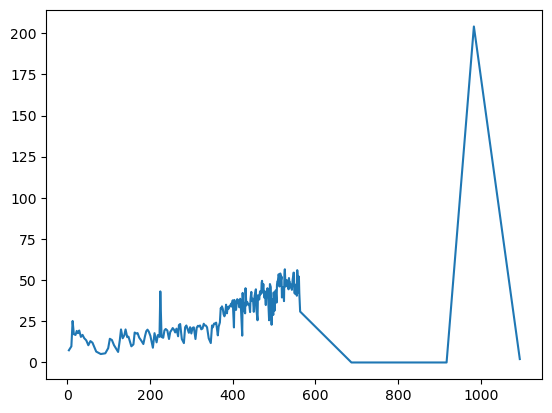

In [261]:
plt.plot(x,y)

In [ ]:
start_at_zero = []
interp_times = []
feature_copy = features.copy()

for idx, row in features.iterrows():
    x = np.array(time[idx]).astype(int)
    start_at_zero.append(True)
    if min(x) > 0:
        start_at_zero[-1] = False

    x_interp = np.arange(0, max(x), time_interval)
    interp_times.append(x_interp)

    for col in feature_copy.columns:
        cell = np.array(row[col])
        if len(list(filter(None, cell))) == 0:
            row[col] = np.nan
        else:
            count_vals = pd.Series(cell).value_counts().to_list()
            if len(count_vals) <= 1:
                to_drop = True
            elif ((count_vals[0] / count_vals[1]) < freq_cut):
                to_drop = False
            elif (len(count_vals) / len(feature_copy[col]) > unique_cut):
                to_drop = False
            else:
                to_drop = True

            if to_drop:
                row[col] = np.nan
            else:
                row[col] = cell
        try:
            y = cell.astype(float) 
            y_cubic = interp1d(x, y, kind='cubic', bounds_error=False, fill_value=y[[0]])
            y_interp = y_cubic(x_interp)

            row[col] = y_interp

        except ValueError:
            continue  
for col in feature_copy.columns:
    if (feature_copy[col].isna().sum() / len(feature_copy[col])) >= none_freq:
        feature_copy = feature_copy.drop(col, axis=1)
feature_copy['interpolated_time'] = interp_times
feature_copy['time_start_at_zero'] = start_at_zero

In [166]:
from src.preprocessing import feature_pruning
pruned_features = feature_pruning(features, time)
pruned_features

,Rf,VT,VE,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,...,Grade,Phase,Ambient_Temp,RH_Amb,Analyzer_Pressure,PB,Ti,Te,interpolated_time,time_start_at_zero
0,"[18.29, 26.75180308914143, 17.6, 18.1965086571...","[0.452, 0.6209065368829562, 0.549, 0.480135428...","[8.268, 16.642064796540417, 9.66, 8.7045635076...","[189.0858298, 559.7813181269902, 278.319911399...","[138.4675518, 406.25985713515706, 206.59725759...","[0.73, 0.7211426478591703, 0.74, 0.73839956118...","[82.3, 105.23671071014239, 95.99999999999999, ...","[9.5, 18.93893467019352, 14.699999999999998, 1...","[37.0, 26.217279142639605, 30.3, 31.4702629002...","[50.5, 36.14119972906257, 40.8, 42.73582409085...",...,"[0.0, 3.324374028376501e-52, -1.05057568862826...","[REST, REST, REST, REST, REST, REST, REST, RES...","[22.1, 22.099999999999998, 22.1, 22.1000000000...","[52.0, 51.99999999999999, 51.99999999999999, 5...","[639.0, 639.0269907884979, 638.9999999999999, ...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[1.07, 0.8518315233722866, 1.1199999999999999,...","[2.21, 1.351790619599702, 2.29, 1.974617407259...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",False
4,"[15.5, 14.809999999999999, 16.276026006845886,...","[0.974950132723634, 0.570080673841539, 0.38467...","[15.116, 8.446, 7.295059535106092, 14.38249432...","[497.4793992, 244.6065718, 249.22407477786766,...","[380.230353, 180.1116693, 168.75227230275695, ...","[0.76, 0.7400000000000001, 0.6815828542592595,...","[166.638966199834, 100.14655129023102, 65.4703...","[29.9827760481954, 14.8894057926413, 10.604808...","[28.2, 30.3, 25.17004030261357, 25.62370227604...","[36.9, 41.10000000000001, 36.73956952286325, 3...",...,"[0.0, 8.331010251020017e-92, 1.116051895098710...","[NONE, REST, REST, REST, REST, REST, REST, RES...","[22.5, 22.5, 22.5, 22.500000000000004, 22.5, 2...",NaN,"[649.0, 649.0, 649.0, 649.0000000000001, 649.0...","[760.0, 760.0, 760.0, 760.0000000000001, 760.0...","[1.45, 1.54, 1.5856177229154358, 1.83605408301...","[2.42, 2.5100000000000002, 1.972224460368583, ...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",True
10,"[14.96, 9.017432510918821, 19.731711659387447,...","[0.646496646655018, 0.743277944013596, 0.34857...","[9.673, 8.52520226118146, 6.5324207147679125, ...","[384.0084722, 355.1094357117334, 259.741065269...","[319.77292, 297.258477690566, 200.852681206289...","[0.83, 0.8484884866275205, 0.7687854533594306,...","[104.622327991806, 118.86172203697642, 56.3463...","[26.1045964579944, 31.043683077847035, 13.3512...","[22.5, 22.644854622200352, 19.647874696310875,...","[27.0, 26.891156408232835, 25.561451283400327,...",...,"[0.0, -1.0099561327475258e-49, 6.7330408849835...","[NONE, REST, REST, REST, REST, REST, REST, RES...","[25.4, 25.395378491149835, 25.403081005900106,...",NaN,"[639.0, 639.0, 638.9999999999999, 638.99999999...","[768.0, 768.0, 767.9999999999999, 767.99999999...","[1.27, 1.264874991441299, 1.1011944501502453, ...","[2.74, 4.247516775903432, 1.9938777049532665, ...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",False
65,"[7.41, -3.815142060961671, 9.79, 20.6697039138...","[1.52036827690762, 1.9053424941556572, 1.03805...","[11.262, 13.891989190334579, 10.16, 6.75452522...","[393.7454097, 489.1582709505118, 328.9288157, ...","[307.6961611, 387.46527587523343, 259.5268188,...","[0.78, 0.8126927088270169, 0.7900000000000001,...","[257.269561545132, 324.5498997696384, 178.4469...","[50.57697286024, 61.78172852848574, 32.3243959...","[27.3, 30.000140400163733, 28.8, 34.6295441762...","[34.9, 37.010506887771825, 36.5, 47.0361569950...",...,"[0.0, -4.737263016582633e-21, 0.0, -5.44785246...","[NONE, REST, REST, REST, REST, REST, REST, RES...","[22.8, 22.799999999999997, 22.799999999999997,...",NaN,"[635.0, 634.3915860176253, 635.0000000000001, ...","[769.0, 768.9999999999999, 768.9999999999999, ...","[2.22, 3.863958208204648, 2.73, 1.049237124620...","[5.88, 6.221571372229379, 3.4, 1.8649613990514...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,..."

In [167]:
pruned_features['outcome'] = data_and_outcomes['composite_outcome']
pruned_features.head(2)

,Rf,VT,VE,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,...,Phase,Ambient_Temp,RH_Amb,Analyzer_Pressure,PB,Ti,Te,interpolated_time,time_start_at_zero,outcome
0,"[18.29, 26.75180308914143, 17.6, 18.1965086571...","[0.452, 0.6209065368829562, 0.549, 0.480135428...","[8.268, 16.642064796540417, 9.66, 8.7045635076...","[189.0858298, 559.7813181269902, 278.319911399...","[138.4675518, 406.25985713515706, 206.59725759...","[0.73, 0.7211426478591703, 0.74, 0.73839956118...","[82.3, 105.23671071014239, 95.99999999999999, ...","[9.5, 18.93893467019352, 14.699999999999998, 1...","[37.0, 26.217279142639605, 30.3, 31.4702629002...","[50.5, 36.14119972906257, 40.8, 42.73582409085...",...,"[REST, REST, REST, REST, REST, REST, REST, RES...","[22.1, 22.099999999999998, 22.1, 22.1000000000...","[52.0, 51.99999999999999, 51.99999999999999, 5...","[639.0, 639.0269907884979, 638.9999999999999, ...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[1.07, 0.8518315233722866, 1.1199999999999999,...","[2.21, 1.351790619599702, 2.29, 1.974617407259...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",False,0.0
4,"[15.5, 14.809999999999999, 16.276026006845886,...","[0.974950132723634, 0.570080673841539, 0.38467...","[15.116, 8.446, 7.295059535106092, 14.38249432...","[497.4793992, 244.6065718, 249.22407477786766,...","[380.230353, 180.1116693, 168.75227230275695, ...","[0.76, 0.7400000000000001, 0.6815828542592595,...","[166.638966199834, 100.14655129023102, 65.4703...","[29.9827760481954, 14.8894057926413, 10.604808...","[28.2, 30.3, 25.17004030261357, 25.62370227604...","[36.9, 41.10000000000001, 36.73956952286325, 3...",...,"[NONE, REST, REST, REST, REST, REST, REST, RES...","[22.5, 22.5, 22.5, 22.500000000000004, 22.5, 2...",NaN,"[649.0, 649.0, 649.0, 649.0000000000001, 649.0...","[760.0, 760.0, 760.0, 760.0000000000001, 760.0...","[1.45, 1.54, 1.5856177229154358, 1.83605408301...","[2.42, 2.5100000000000002, 1.972224460368583, ...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",True,0.0


In [271]:
x = pruned_features['interpolated_time'][0]
y = pruned_features['VE'][0]
spline = np.polyfit(x,y,3)
spline[[0]]

array([-1.6539262e-07])

In [168]:
time_series_features = pd.DataFrame()
for col in pruned_features.iloc[:,0:-3]:
    for idx, row in pruned_features.iterrows():
        try:
            time_series_features.at[idx, col + '_mean'] = np.mean(row[col])
        except:
            time_series_features.at[idx, col + '_mean'] = np.nan
        try:
            time_series_features.at[idx, col + '_max'] = np.max(row[col])
        except:
            time_series_features.at[idx, col + '_max'] = np.nan
        try:
            time_series_features.at[idx, col + '_min'] = np.min(row[col])
        except:
            time_series_features.at[idx, col + '_min'] = np.nan
        try:
            time_series_features.at[idx, col + '_std'] = np.std(row[col])
        except:
            time_series_features.at[idx, col + '_std'] = np.nan
time_series_features

/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/480083839.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  time_series_features.at[idx, col + '_mean'] = np.mean(row[col])
/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/480083839.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  time_series_features.at[idx, col + '_max'] = np.max(row[col])
/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/480083839.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

,Rf_mean,Rf_max,Rf_min,Rf_std,VT_mean,VT_max,VT_min,VT_std,VE_mean,VE_max,...,PB_min,PB_std,Ti_mean,Ti_max,Ti_min,Ti_std,Te_mean,Te_max,Te_min,Te_std
0,26.343108,50.043451,6.693317,7.409566,0.817306,1.412597,0.212274,0.229081,21.862376,53.535141,...,755.0,9.504415e-14,0.995927,1.650559,0.137207,0.219165,1.472634,5.120000,0.297896,0.688078
4,19.614454,39.811840,6.092655,6.364680,1.437693,2.867007,0.182088,0.818760,31.405264,101.433000,...,760.0,9.441178e-14,1.377040,2.725223,0.710000,0.324599,2.017309,6.310680,0.771320,0.892687
10,58.432143,430.980933,-99.208942,117.091794,-0.112978,12.462207,-18.777080,5.948967,-57.271659,222.796267,...,768.0,1.701798e-12,1.103423,12.406791,-2.452976,2.030230,3.013339,16.726619,-4.910225,4.298140
65,28.868194,273.182742,-80.721037,77.819433,1.109187,16.276086,-26.921050,8.204924,25.747473,581.842044,...,769.0,5.647887e-13,-1.594959,14.364197,-17.006261,6.382874,0.617950,17.483468,-21.293804,9.628577
66,24.168326,50.850000,8.314214,7.372894,1.071057,2.478000,0.134769,0.391668,26.850003,67.908916,...,760.0,9.430345e-14,1.059486,2.320000,0.370000,0.245523,1.689527,4.930000,0.690000,0.806292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19194,19.402535,47.240000,-10.887953,9.491448,1.713780,5.233529,-0.478015,0.983272,33.479192,124.992000,...,761.0,1.147679e-13,1.261722,5.210000,-0.296907,0.611369,2.887820,20.597104,-0.374348,2.831246
19195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19196,22.783616,47.620000,0.508465,8.307436,1.293571,2.752462,0.302960,0.505078,31.283518,91.491000,...,761.0,8.294139e-14,1.146402,2.545001,0.490448,0.371409,1.916890,7.405464,0.690000,1.070630


In [169]:
# could pad/cut to specific length to have full time series
# fit a spline model and extrapolate the parameters and use those terms as the data <--- WORK ON THIS
# frequency domain features (maybe not as useful)
# dynamic time warping (look up)
# use list of features Narayan sends for time-series
# quartiles/ quantiles of the data

In [195]:
time_series_features['output'] = data_and_outcomes['composite_outcome'].fillna(0)
time_series_features = time_series_features.dropna(thresh=20)
time_series_features

,Rf_mean,Rf_max,Rf_min,Rf_std,VT_mean,VT_max,VT_min,VT_std,VE_mean,VE_max,...,PB_std,Ti_mean,Ti_max,Ti_min,Ti_std,Te_mean,Te_max,Te_min,Te_std,output
0,26.343108,50.043451,6.693317,7.409566,0.817306,1.412597,0.212274,0.229081,21.862376,53.535141,...,9.504415e-14,0.995927,1.650559,0.137207,0.219165,1.472634,5.120000,0.297896,0.688078,0.0
4,19.614454,39.811840,6.092655,6.364680,1.437693,2.867007,0.182088,0.818760,31.405264,101.433000,...,9.441178e-14,1.377040,2.725223,0.710000,0.324599,2.017309,6.310680,0.771320,0.892687,0.0
10,58.432143,430.980933,-99.208942,117.091794,-0.112978,12.462207,-18.777080,5.948967,-57.271659,222.796267,...,1.701798e-12,1.103423,12.406791,-2.452976,2.030230,3.013339,16.726619,-4.910225,4.298140,0.0
65,28.868194,273.182742,-80.721037,77.819433,1.109187,16.276086,-26.921050,8.204924,25.747473,581.842044,...,5.647887e-13,-1.594959,14.364197,-17.006261,6.382874,0.617950,17.483468,-21.293804,9.628577,0.0
66,24.168326,50.850000,8.314214,7.372894,1.071057,2.478000,0.134769,0.391668,26.850003,67.908916,...,9.430345e-14,1.059486,2.320000,0.370000,0.245523,1.689527,4.930000,0.690000,0.806292,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19129,28.130446,57.690000,8.953067,10.255420,0.593025,1.397540,0.256980,0.176173,17.077211,37.947000,...,8.460670e-14,1.045445,2.631573,0.370000,0.354377,1.416997,5.172892,0.432063,0.765242,0.0
19133,17.211277,46.510000,-19.173487,6.790479,2.584275,4.566000,-0.198407,1.015591,43.817089,118.897000,...,1.093749e-13,1.370348,9.806264,-1.614586,0.950670,2.624660,14.369006,0.890000,1.570858,0.0
19169,22.120486,53.100000,3.484399,8.736458,1.318394,2.554328,0.029755,0.458215,30.436016,80.018000,...,1.064166e-13,1.277455,5.971501,-0.259734,0.721944,1.971006,8.640904,0.580000,1.201051,0.0
19194,19.402535,47.240000,-10.887953,9.491448,1.713780,5.233529,-0.478015,0.983272,33.479192,124.992000,...,1.147679e-13,1.261722,5.210000,-0.296907,0.611369,2.887820,20.597104,-0.374348,2.831246,0.0


In [1]:
time_series_features[1221]

NameError: name 'time_series_features' is not defined

In [196]:
time_series_features['output'].value_counts()

output
0.0    2612
1.0     590
Name: count, dtype: int64

In [197]:
from sklearn.model_selection import train_test_split
#stratify to test and train have same percentage of death
#cross-validation for testing hyperparameters <--- IMPORTANT
X_train, X_test, y_train, y_test = train_test_split(time_series_features[time_series_features.columns.drop('output')].to_numpy(), time_series_features['output'].to_numpy(), test_size=0.2, random_state=1115)

In [208]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mean_squared_error, confusion_matrix
from tqdm import tqdm
from xgboost import XGBClassifier

In [209]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

/opt/miniconda3/envs/cpetai/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:45:59] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [210]:
y_pred = model.predict(X_test)

In [211]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[496,  23],
       [104,  18]])

In [212]:
tn, fp, fn, tp = conf_mat.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall (sensitivity)
recall = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('Specificity: ' + str(specificity))

Precision: 0.43902439024390244
Recall: 0.14754098360655737
Specificity: 0.9556840077071291


In [213]:
values = model.feature_importances_
top_k_features = pd.DataFrame()
feat_coef_dict = dict(zip(time_series_features.columns, values))
top_k = sorted(feat_coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[0:20]
top_k_features['feature'] = [i[0] for i in top_k]
top_k_features['importance'] = [i[1] for i in top_k]
top_k_features['abs_importance'] = top_k_features['importance'].abs()
top_k_features
#shapley values instead of imprtance

,feature,importance,abs_importance
0,METS_std,0.054703,0.054703
1,METS_max,0.045619,0.045619
2,HR_max,0.020781,0.020781
3,VO2/Kg_max,0.018651,0.018651
4,VCO2_std,0.016077,0.016077
5,O2exp_max,0.015856,0.015856
6,VE/VCO2_mean,0.015634,0.015634
7,VE/VO2_std,0.015529,0.015529
8,CO2exp_std,0.014123,0.014123
9,VO2/HR_std,0.014000,0.014000


In [214]:
from sklearn.metrics import roc_auc_score

In [215]:
roc_auc_score(y_test, y_pred)

0.5516124956568432

# Cubic Fit

In [272]:
pruned_features

,Rf,VT,VE,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,...,Phase,Ambient_Temp,RH_Amb,Analyzer_Pressure,PB,Ti,Te,interpolated_time,time_start_at_zero,outcome
0,"[18.29, 26.75180308914143, 17.6, 18.1965086571...","[0.452, 0.6209065368829562, 0.549, 0.480135428...","[8.268, 16.642064796540417, 9.66, 8.7045635076...","[189.0858298, 559.7813181269902, 278.319911399...","[138.4675518, 406.25985713515706, 206.59725759...","[0.73, 0.7211426478591703, 0.74, 0.73839956118...","[82.3, 105.23671071014239, 95.99999999999999, ...","[9.5, 18.93893467019352, 14.699999999999998, 1...","[37.0, 26.217279142639605, 30.3, 31.4702629002...","[50.5, 36.14119972906257, 40.8, 42.73582409085...",...,"[REST, REST, REST, REST, REST, REST, REST, RES...","[22.1, 22.099999999999998, 22.1, 22.1000000000...","[52.0, 51.99999999999999, 51.99999999999999, 5...","[639.0, 639.0269907884979, 638.9999999999999, ...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[1.07, 0.8518315233722866, 1.1199999999999999,...","[2.21, 1.351790619599702, 2.29, 1.974617407259...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",False,0.0
4,"[15.5, 14.809999999999999, 16.276026006845886,...","[0.974950132723634, 0.570080673841539, 0.38467...","[15.116, 8.446, 7.295059535106092, 14.38249432...","[497.4793992, 244.6065718, 249.22407477786766,...","[380.230353, 180.1116693, 168.75227230275695, ...","[0.76, 0.7400000000000001, 0.6815828542592595,...","[166.638966199834, 100.14655129023102, 65.4703...","[29.9827760481954, 14.8894057926413, 10.604808...","[28.2, 30.3, 25.17004030261357, 25.62370227604...","[36.9, 41.10000000000001, 36.73956952286325, 3...",...,"[NONE, REST, REST, REST, REST, REST, REST, RES...","[22.5, 22.5, 22.5, 22.500000000000004, 22.5, 2...",NaN,"[649.0, 649.0, 649.0, 649.0000000000001, 649.0...","[760.0, 760.0, 760.0, 760.0000000000001, 760.0...","[1.45, 1.54, 1.5856177229154358, 1.83605408301...","[2.42, 2.5100000000000002, 1.972224460368583, ...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",True,0.0
10,"[14.96, 9.017432510918821, 19.731711659387447,...","[0.646496646655018, 0.743277944013596, 0.34857...","[9.673, 8.52520226118146, 6.5324207147679125, ...","[384.0084722, 355.1094357117334, 259.741065269...","[319.77292, 297.258477690566, 200.852681206289...","[0.83, 0.8484884866275205, 0.7687854533594306,...","[104.622327991806, 118.86172203697642, 56.3463...","[26.1045964579944, 31.043683077847035, 13.3512...","[22.5, 22.644854622200352, 19.647874696310875,...","[27.0, 26.891156408232835, 25.561451283400327,...",...,"[NONE, REST, REST, REST, REST, REST, REST, RES...","[25.4, 25.395378491149835, 25.403081005900106,...",NaN,"[639.0, 639.0, 638.9999999999999, 638.99999999...","[768.0, 768.0, 767.9999999999999, 767.99999999...","[1.27, 1.264874991441299, 1.1011944501502453, ...","[2.74, 4.247516775903432, 1.9938777049532665, ...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",False,0.0
65,"[7.41, -3.815142060961671, 9.79, 20.6697039138...","[1.52036827690762, 1.9053424941556572, 1.03805...","[11.262, 13.891989190334579, 10.16, 6.75452522...","[393.7454097, 489.1582709505118, 328.9288157, ...","[307.6961611, 387.46527587523343, 259.5268188,...","[0.78, 0.8126927088270169, 0.7900000000000001,...","[257.269561545132, 324.5498997696384, 178.4469...","[50.57697286024, 61.78172852848574, 32.3243959...","[27.3, 30.000140400163733, 28.8, 34.6295441762...","[34.9, 37.010506887771825, 36.5, 47.0361569950...",...,"[NONE, REST, REST, REST, REST, REST, REST, RES...","[22.8, 22.799999999999997, 22.799999999999997,...",NaN,"[635.0, 634.3915860176253, 635.0000000000001, ...","[769.0, 768.9999999999999, 768.9999999999999, ...","[2.22, 3.863958208204648, 2.73, 1.049237124620...","[5.88, 6.221571372229379, 3.4, 1.8649613990514...","[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",False,0.0
66,"[10.2, 10.2, 16.676311038293004, 19.93, 16.737...","[0.992, 0.992, 0.4982177811417036, 0.456, 0.29...","[10.122, 10.122, 8.229953414091105, 9.09000000...","[309.1328732, 309.13287

In [273]:
best_fit_features = pd.DataFrame()
interp_time = pruned_features['interpolated_time']
for col in pruned_features.iloc[:,0:-3]:
    for idx, row in pruned_features.iterrows():
        try:
            x = np.array(interp_time[idx]).astype(float)
            y = np.array(row[col]).astype(float)
            cubicFit = np.polyfit(x, y, 3)
            best_fit_features.at[idx, col + '_a'] = cubicFit[0]
            best_fit_features.at[idx, col + '_b'] = cubicFit[1]
            best_fit_features.at[idx, col + '_c'] = cubicFit[1]
            best_fit_features.at[idx, col + '_d'] = cubicFit[1]
        except:
            best_fit_features.at[idx, col + '_a'] = np.nan
            best_fit_features.at[idx, col + '_b'] = np.nan
            best_fit_features.at[idx, col + '_c'] = np.nan
            best_fit_features.at[idx, col + '_d'] = np.nan

best_fit_features

/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/2883818935.py:8: RankWarning: Polyfit may be poorly conditioned
  cubicFit = np.polyfit(x, y, 3)
/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/2883818935.py:8: RankWarning: Polyfit may be poorly conditioned
  cubicFit = np.polyfit(x, y, 3)
/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/2883818935.py:8: RankWarning: Polyfit may be poorly conditioned
  cubicFit = np.polyfit(x, y, 3)
/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/2883818935.py:8: RankWarning: Polyfit may be poorly conditioned
  cubicFit = np.polyfit(x, y, 3)
/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/2883818935.py:8: RankWarning: Polyfit may be poorly conditioned
  cubicFit = np.polyfit(x, y, 3)
/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/2883818935.py:8: RankWarning: Polyfit may be poorly conditioned
  cubicFit = np.polyfit(x, y, 3)
/var/folders/yz/gdzsf62s3rjg

,Rf_a,Rf_b,Rf_c,Rf_d,VT_a,VT_b,VT_c,VT_d,VE_a,VE_b,...,PB_c,PB_d,Ti_a,Ti_b,Ti_c,Ti_d,Te_a,Te_b,Te_c,Te_d
0,-1.002770e-07,0.000081,0.000081,0.000081,-1.588848e-09,1.215974e-07,1.215974e-07,1.215974e-07,-1.653926e-07,0.000133,...,5.554444e-18,5.554444e-18,1.636662e-09,-4.522959e-07,-4.522959e-07,-4.522959e-07,5.754393e-09,-4.495366e-06,-4.495366e-06,-4.495366e-06
4,8.821136e-08,-0.000069,-0.000069,-0.000069,-9.949957e-09,1.720266e-05,1.720266e-05,1.720266e-05,1.250397e-07,0.000047,...,-6.360103e-18,-6.360103e-18,-2.350077e-09,1.539374e-06,1.539374e-06,1.539374e-06,-2.155996e-09,7.175644e-07,7.175644e-07,7.175644e-07
10,-2.979585e-06,0.004088,0.004088,0.004088,1.667333e-07,-2.177164e-04,-2.177164e-04,-2.177164e-04,5.046682e-06,-0.007135,...,-4.940150e-17,-4.940150e-17,6.830417e-08,-8.439741e-05,-8.439741e-05,-8.439741e-05,1.049401e-07,-1.114344e-04,-1.114344e-04,-1.114344e-04
65,1.630567e-06,-0.002265,-0.002265,-0.002265,-3.602655e-08,7.143762e-05,7.143762e-05,7.143762e-05,-8.430342e-07,0.001916,...,-8.068975e-19,-8.068975e-19,5.559297e-08,-1.034081e-04,-1.034081e-04,-1.034081e-04,2.088600e-07,-2.794412e-04,-2.794412e-04,-2.794412e-04
66,-4.418765e-08,0.000031,0.000031,0.000031,-3.511287e-09,2.875418e-06,2.875418e-06,2.875418e-06,-1.719527e-07,0.000170,...,8.162043e-19,8.162043e-19,8.614484e-10,-3.426131e-07,-3.426131e-07,-3.426131e-07,-1.095970e-09,5.579261e-06,5.579261e-06,5.579261e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19194,2.415416e-08,-0.000111,-0.000111,-0.000111,-2.406281e-08,1.744877e-05,1.744877e-05,1.744877e-05,-4.715758e-07,0.000186,...,-7.699539e-18,-7.699539e-18,-4.109236e-09,7.281817e-06,7.281817e-06,7.281817e-06,6.219201e-09,1.439077e-05,1.439077e-05,1.439077e-05
19195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19196,-1.045411e-08,0.000074,0.000074,0.000074,-2.256158e-09,3.564160e-06,3.564160e-06,3.564160e-06,1.742475e-07,0.000042,...,-1.367837e-17,-1.367837e-17,8.635577e-09,-8.682714e-06,-8.682714e-06,-8.682714e-06,3.211197e-08,-3.003313e-05,-3.003313e-05,-3.003313e-05


In [275]:
best_fit_features['output'] = data_and_outcomes['composite_outcome'].fillna(0)
best_fit_features.dropna(thresh=20)

/var/folders/yz/gdzsf62s3rjg09h2ns2j9kv00000gn/T/ipykernel_66732/4116203497.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  best_fit_features['output'] = data_and_outcomes['composite_outcome'].fillna(0)


,Rf_a,Rf_b,Rf_c,Rf_d,VT_a,VT_b,VT_c,VT_d,VE_a,VE_b,...,PB_d,Ti_a,Ti_b,Ti_c,Ti_d,Te_a,Te_b,Te_c,Te_d,output
0,-1.002770e-07,0.000081,0.000081,0.000081,-1.588848e-09,1.215974e-07,1.215974e-07,1.215974e-07,-1.653926e-07,0.000133,...,5.554444e-18,1.636662e-09,-4.522959e-07,-4.522959e-07,-4.522959e-07,5.754393e-09,-4.495366e-06,-4.495366e-06,-4.495366e-06,0.0
4,8.821136e-08,-0.000069,-0.000069,-0.000069,-9.949957e-09,1.720266e-05,1.720266e-05,1.720266e-05,1.250397e-07,0.000047,...,-6.360103e-18,-2.350077e-09,1.539374e-06,1.539374e-06,1.539374e-06,-2.155996e-09,7.175644e-07,7.175644e-07,7.175644e-07,0.0
10,-2.979585e-06,0.004088,0.004088,0.004088,1.667333e-07,-2.177164e-04,-2.177164e-04,-2.177164e-04,5.046682e-06,-0.007135,...,-4.940150e-17,6.830417e-08,-8.439741e-05,-8.439741e-05,-8.439741e-05,1.049401e-07,-1.114344e-04,-1.114344e-04,-1.114344e-04,0.0
65,1.630567e-06,-0.002265,-0.002265,-0.002265,-3.602655e-08,7.143762e-05,7.143762e-05,7.143762e-05,-8.430342e-07,0.001916,...,-8.068975e-19,5.559297e-08,-1.034081e-04,-1.034081e-04,-1.034081e-04,2.088600e-07,-2.794412e-04,-2.794412e-04,-2.794412e-04,0.0
66,-4.418765e-08,0.000031,0.000031,0.000031,-3.511287e-09,2.875418e-06,2.875418e-06,2.875418e-06,-1.719527e-07,0.000170,...,8.162043e-19,8.614484e-10,-3.426131e-07,-3.426131e-07,-3.426131e-07,-1.095970e-09,5.579261e-06,5.579261e-06,5.579261e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19129,-6.748039e-07,0.000576,0.000576,0.000576,-8.917624e-09,8.174307e-06,8.174307e-06,8.174307e-06,-6.669506e-07,0.000597,...,-2.983868e-18,2.471100e-08,-2.225347e-05,-2.225347e-05,-2.225347e-05,6.593968e-09,1.691279e-06,1.691279e-06,1.691279e-06,0.0
19133,-2.402593e-08,0.000024,0.000024,0.000024,-1.191431e-08,1.194928e-05,1.194928e-05,1.194928e-05,-3.338778e-07,0.000357,...,-3.380173e-18,-1.176444e-09,1.611277e-06,1.611277e-06,1.611277e-06,1.173007e-10,7.375719e-06,7.375719e-06,7.375719e-06,0.0
19169,-9.877228e-08,0.000094,0.000094,0.000094,-4.754222e-09,4.174745e-06,4.174745e-06,4.174745e-06,-2.476406e-07,0.000233,...,-2.689110e-18,8.889250e-10,1.714865e-06,1.714865e-06,1.714865e-06,5.706976e-09,-1.879694e-06,-1.879694e-06,-1.879694e-06,0.0
19194,2.415416e-08,-0.000111,-0.000111,-0.000111,-2.406281e-08,1.744877e-05,1.744877e-05,1.744877e-05,-4.715758e-07,0.000186,...,-7.699539e-18,-4.109236e-09,7.281817e-06,7.281817e-06,7.281817e-06,6.219201e-09,1.439077e-05,1.439077e-05,1.439077e-05,0.0


In [277]:
X_train, X_test, y_train, y_test = train_test_split(best_fit_features[best_fit_features.columns.drop('output')].to_numpy(), best_fit_features['output'].to_numpy(), test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

/opt/miniconda3/envs/cpetai/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:34:54] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [285]:
best_fit_features['output'].value_counts()

output
0.0    3123
1.0     671
Name: count, dtype: int64

In [278]:
y_pred = model.predict(X_test)

In [279]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[601,  15],
       [131,  12]])

In [280]:
tn, fp, fn, tp = conf_mat.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall (sensitivity)
recall = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('Specificity: ' + str(specificity))

Precision: 0.4444444444444444
Recall: 0.08391608391608392
Specificity: 0.9756493506493507


In [283]:
values = model.feature_importances_
top_k_features = pd.DataFrame()
feat_coef_dict = dict(zip(best_fit_features.columns, values))
top_k = sorted(feat_coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[0:20]
top_k_features['feature'] = [i[0] for i in top_k]
top_k_features['importance'] = [i[1] for i in top_k]
top_k_features['abs_importance'] = top_k_features['importance'].abs()
top_k_features

,feature,importance,abs_importance
0,VE/VO2_a,0.026128,0.026128
1,RH_Amb_b,0.026103,0.026103
2,Grade_b,0.024727,0.024727
3,VT_a,0.024574,0.024574
4,VE/VO2_b,0.024134,0.024134
5,VCO2_a,0.023896,0.023896
6,FetCO2_b,0.022997,0.022997
7,FeO2_b,0.022760,0.022760
8,Speed_a,0.022439,0.022439
9,FeCO2_b,0.022309,0.022309


In [284]:
roc_auc_score(y_test, y_pred)

0.5297827172827173